In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

In [81]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

## Reading the data

In [82]:
train_df.head()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
0,1,66.0,NaN,4000.0,NaN,1.0,0.569108,0.05488766900000001,0.0,0.0,0.0,0
1,2,61.0,2.0,4000.0,6.0,1.0,0.297176,0.10194991099999999,0.0,0.0,0.0,0
2,3,31.0,2.0,3040.0,8.0,0.0,0.160145,1.22713507,4.0,0.0,0.0,1
3,4,54.0,4.0,10218.0,5.0,0.0,0.067913,0.08327777900000001,0.0,0.0,0.0,0
4,5,29.0,0.0,4468.0,6.0,0.0,0.328261,0.317445504,0.0,0.0,0.0,0


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72161 entries, 0 to 72160
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                72161 non-null  int64  
 1   age                                               65017 non-null  float64
 2   number_dependent_family_members                   67945 non-null  float64
 3   monthly_income                                    66145 non-null  float64
 4   number_of_credit_lines                            66007 non-null  float64
 5   real_estate_loans                                 68355 non-null  float64
 6   ratio_debt_payment_to_income                      66553 non-null  float64
 7   credit_line_utilization                           65815 non-null  object 
 8   number_of_previous_late_payments_up_to_59_days    67966 non-null  float64
 9   number_of_previou

In [84]:
train_df.describe()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
count,72161.000000,65017.000000,67945.000000,6.614500e+04,66007.000000,68355.000000,66553.000000,67966.000000,66316.000000,68540.000000,72161.000000
mean,36081.000000,51.388914,0.847009,6.624388e+03,8.756193,1.050296,26.524005,0.393491,0.206074,0.224059,0.069470
std,20831.230725,14.414338,1.144038,1.084630e+04,5.198769,1.114420,399.253008,3.680686,3.696260,3.634436,0.254253
min,1.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18041.000000,41.000000,0.000000,3.400000e+03,5.000000,0.000000,0.141302,0.000000,0.000000,0.000000,0.000000
50%,36081.000000,51.000000,0.000000,5.400000e+03,8.000000,1.000000,0.294673,0.000000,0.000000,0.000000,0.000000
75%,54121.000000,62.000000,2.000000,8.232000e+03,11.000000,2.000000,0.480989,0.000000,0.000000,0.000000,0.000000
max,72161.000000,103.000000,13.000000,1.560100e+06,57.000000,25.000000,61106.500000,98.000000,98.000000,98.000000,1.000000


In [85]:
test_df.head()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more
0,1,30.0,2.0,2200.0,0.0,0.0,0.000000,0.9999998999999999,NaN,0.0,0.0
1,2,25.0,2.0,1500.0,3.0,0.0,0.269820,NaN,1.0,1.0,3.0
2,3,48.0,2.0,7163.0,12.0,0.0,0.011865,0.065853835,0.0,0.0,0.0
3,4,57.0,0.0,6214.0,6.0,1.0,0.423652,NaN,0.0,0.0,0.0
4,5,41.0,0.0,1438.0,5.0,0.0,0.282835,0.937578027,2.0,0.0,0.0


In [86]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48108 entries, 0 to 48107
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                48108 non-null  int64  
 1   age                                               43270 non-null  float64
 2   number_dependent_family_members                   45320 non-null  float64
 3   monthly_income                                    43994 non-null  float64
 4   number_of_credit_lines                            43990 non-null  float64
 5   real_estate_loans                                 45649 non-null  float64
 6   ratio_debt_payment_to_income                      44344 non-null  float64
 7   credit_line_utilization                           43798 non-null  object 
 8   number_of_previous_late_payments_up_to_59_days    45296 non-null  float64
 9   number_of_previou

In [87]:
test_df.describe()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more
count,48108.000000,43270.000000,45320.000000,4.399400e+04,43990.000000,45649.000000,44344.000000,45296.000000,44175.000000,45654.000000
mean,24054.500000,51.243517,0.859466,6.718883e+03,8.751739,1.061776,26.158818,0.358619,0.165161,0.189972
std,13887.727712,14.439890,1.156826,1.865921e+04,5.139796,1.195983,392.638572,3.129090,3.108069,3.143991
min,1.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12027.750000,40.000000,0.000000,3.400000e+03,5.000000,0.000000,0.146447,0.000000,0.000000,0.000000
50%,24054.500000,51.000000,0.000000,5.400000e+03,8.000000,1.000000,0.298229,0.000000,0.000000,0.000000
75%,36081.250000,61.000000,2.000000,8.207500e+03,11.000000,2.000000,0.483507,0.000000,0.000000,0.000000
max,48108.000000,103.000000,20.000000,3.008750e+06,58.000000,54.000000,49112.000000,98.000000,98.000000,98.000000


We can see that credit_line_utilization column is shown as object although it is float. It  happened because of the commas in values. So we need to change commas to dots, and convert the values to float

In [88]:
#replace the commas with dots and converting to float in credit_line_utilization column
test_df['credit_line_utilization'].replace(',','.',regex=True, inplace=True)
test_df["credit_line_utilization"] = pd.to_numeric(test_df["credit_line_utilization"])
train_df['credit_line_utilization'].replace(',','.',regex=True, inplace=True)
train_df["credit_line_utilization"] = pd.to_numeric(train_df["credit_line_utilization"])

In [89]:
#checking the column
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72161 entries, 0 to 72160
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                72161 non-null  int64  
 1   age                                               65017 non-null  float64
 2   number_dependent_family_members                   67945 non-null  float64
 3   monthly_income                                    66145 non-null  float64
 4   number_of_credit_lines                            66007 non-null  float64
 5   real_estate_loans                                 68355 non-null  float64
 6   ratio_debt_payment_to_income                      66553 non-null  float64
 7   credit_line_utilization                           65815 non-null  float64
 8   number_of_previous_late_payments_up_to_59_days    67966 non-null  float64
 9   number_of_previou

In [90]:
#Now it is float

In [91]:
test_df.columns

Index(['Id', 'age', 'number_dependent_family_members', 'monthly_income',
       'number_of_credit_lines', 'real_estate_loans',
       'ratio_debt_payment_to_income', 'credit_line_utilization',
       'number_of_previous_late_payments_up_to_59_days',
       'number_of_previous_late_payments_up_to_89_days',
       'number_of_previous_late_payments_90_days_or_more'],
      dtype='object')

In [92]:
#drop ID column
train_df.drop(labels='Id', axis=1, inplace=True)
test_df.drop(labels='Id', axis=1, inplace=True)

In [93]:
train_df.head()

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
0,66.0,NaN,4000.0,NaN,1.0,0.569108,0.054888,0.0,0.0,0.0,0
1,61.0,2.0,4000.0,6.0,1.0,0.297176,0.101950,0.0,0.0,0.0,0
2,31.0,2.0,3040.0,8.0,0.0,0.160145,1.227135,4.0,0.0,0.0,1
3,54.0,4.0,10218.0,5.0,0.0,0.067913,0.083278,0.0,0.0,0.0,0
4,29.0,0.0,4468.0,6.0,0.0,0.328261,0.317446,0.0,0.0,0.0,0


## Visualize train data

### Visualize distribution of numerical values for train data. 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'number_dependent_family_members'}>,
        <AxesSubplot:title={'center':'monthly_income'}>],
       [<AxesSubplot:title={'center':'number_of_credit_lines'}>,
        <AxesSubplot:title={'center':'real_estate_loans'}>,
        <AxesSubplot:title={'center':'ratio_debt_payment_to_income'}>],
       [<AxesSubplot:title={'center':'credit_line_utilization'}>,
        <AxesSubplot:title={'center':'number_of_previous_late_payments_up_to_59_days'}>,
        <AxesSubplot:title={'center':'number_of_previous_late_payments_up_to_89_days'}>],
       [<AxesSubplot:title={'center':'number_of_previous_late_payments_90_days_or_more'}>,
        <AxesSubplot:title={'center':'defaulted_on_loan'}>,
        <AxesSubplot:>]], dtype=object)

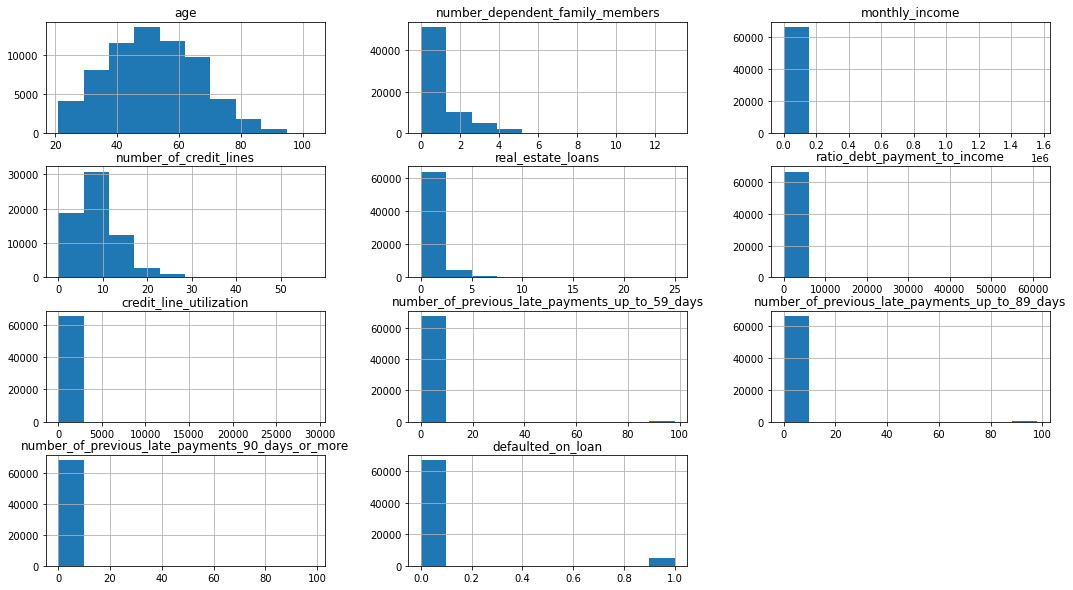

In [94]:
train_df.hist(train_df.columns.values.tolist(), figsize=(18,10))

From this graph we can visualize that, none of the graph look like bell curve, meaning it is not normally distributed. The reason of that is outliers in our data.For train model we will get rid of outliers by removing them.

Text(0, 0.5, 'Frequency')

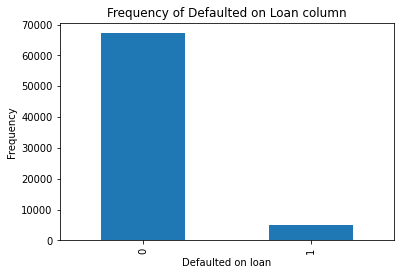

In [95]:
pd.value_counts(df['defaulted_on_loan']).plot.bar()
plt.title('Frequency of Defaulted on Loan column')
plt.xlabel('Defaulted on loan')
plt.ylabel('Frequency')

We can visualize that there is imbalancing in our 'defaulted_on_loan' column in train data, so we need to use balancing technique as well.

defaulted_on_loan                                   1.000000
number_of_previous_late_payments_up_to_59_days      0.124243
number_of_previous_late_payments_90_days_or_more    0.113465
number_of_previous_late_payments_up_to_89_days      0.100133
number_dependent_family_members                     0.047568
credit_line_utilization                            -0.002596
ratio_debt_payment_to_income                       -0.004037
real_estate_loans                                  -0.006268
number_of_credit_lines                             -0.024021
monthly_income                                     -0.025232
age                                                -0.104907
Name: defaulted_on_loan, dtype: float64


<AxesSubplot:>

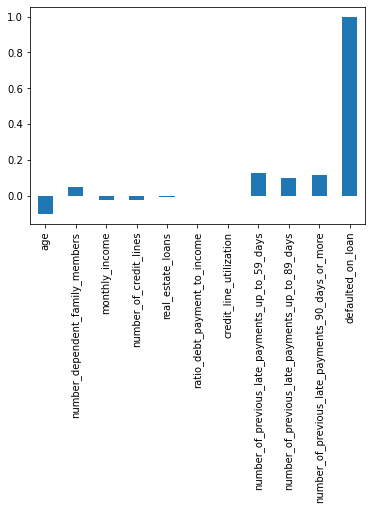

In [96]:
#Checking the correlation before removing ooutiers
corr_matrix = train_df.corr()
print(corr_matrix["defaulted_on_loan"].sort_values(ascending=False))
(corr_matrix["defaulted_on_loan"]).plot.bar()

The correlation between columns and target variable is very low for now, we will recheck it after removing outliers.

### Removing outliers 

In [97]:
train_df.drop(train_df.index[train_df['number_of_previous_late_payments_up_to_59_days'] >8], inplace = True)
train_df.drop(train_df.index[train_df['number_of_previous_late_payments_up_to_89_days'] >4], inplace = True)
train_df.drop(train_df.index[train_df['number_of_previous_late_payments_90_days_or_more'] >5], inplace = True)
train_df.drop(train_df.index[train_df['credit_line_utilization'] >4], inplace = True)
train_df.drop(train_df.index[train_df['monthly_income'] >30000], inplace = True)
train_df.drop(train_df.index[train_df['real_estate_loans'] >8], inplace = True)
train_df.drop(train_df.index[train_df['ratio_debt_payment_to_income'] >2], inplace = True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'number_dependent_family_members'}>,
        <AxesSubplot:title={'center':'monthly_income'}>],
       [<AxesSubplot:title={'center':'number_of_credit_lines'}>,
        <AxesSubplot:title={'center':'real_estate_loans'}>,
        <AxesSubplot:title={'center':'ratio_debt_payment_to_income'}>],
       [<AxesSubplot:title={'center':'credit_line_utilization'}>,
        <AxesSubplot:title={'center':'number_of_previous_late_payments_up_to_59_days'}>,
        <AxesSubplot:title={'center':'number_of_previous_late_payments_up_to_89_days'}>],
       [<AxesSubplot:title={'center':'number_of_previous_late_payments_90_days_or_more'}>,
        <AxesSubplot:title={'center':'defaulted_on_loan'}>,
        <AxesSubplot:>]], dtype=object)

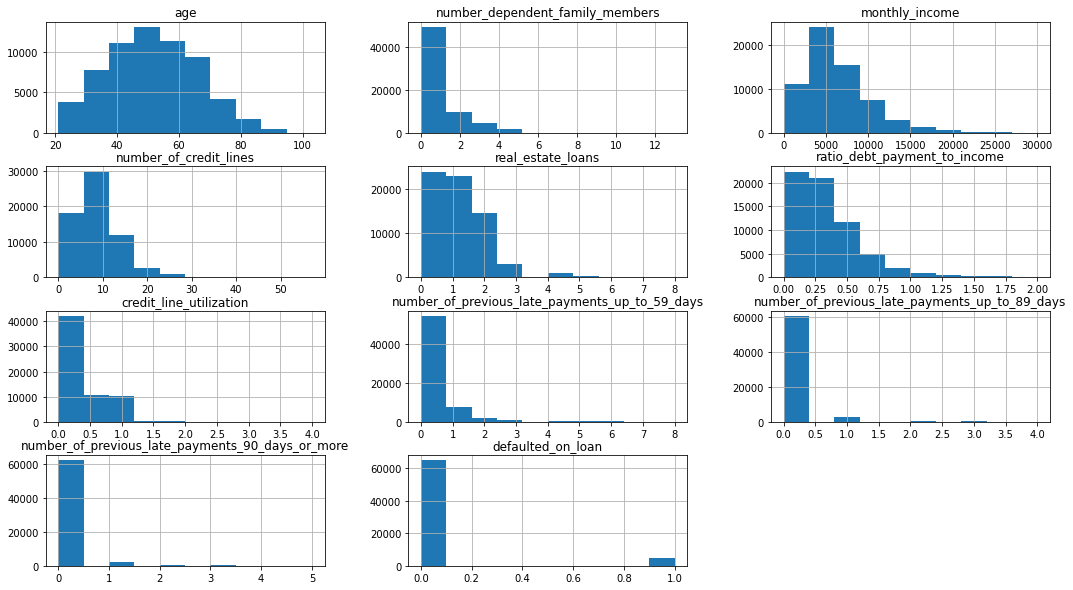

In [98]:
#checking distribution after removing outliers
train_df.hist(train_df.columns.values.tolist(), figsize=(18,10))

As we can see that now our data is more distributed. Let's recheck the correlation.

defaulted_on_loan                                   1.000000
number_of_previous_late_payments_90_days_or_more    0.316479
credit_line_utilization                             0.269451
number_of_previous_late_payments_up_to_59_days      0.269414
number_of_previous_late_payments_up_to_89_days      0.265701
ratio_debt_payment_to_income                        0.076094
number_dependent_family_members                     0.048051
real_estate_loans                                  -0.015760
number_of_credit_lines                             -0.024042
monthly_income                                     -0.057593
age                                                -0.103747
Name: defaulted_on_loan, dtype: float64


<AxesSubplot:>

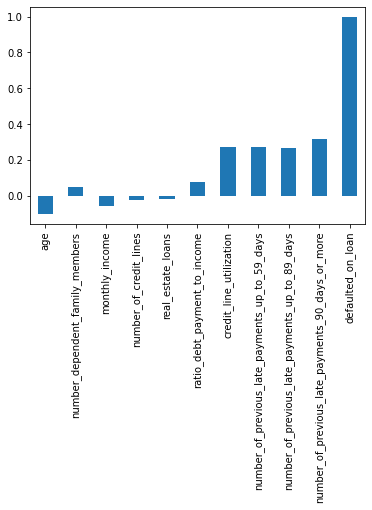

In [99]:
corr_matrix = train_df.corr()
print(corr_matrix["defaulted_on_loan"].sort_values(ascending=False))
(corr_matrix["defaulted_on_loan"]).plot.bar()

We can see that our correlation values increases significantly. I also chekced IsolationForest method to remove outliers however, the correlation values were less than manual removing technique. So I prefer manual removig for train data.

## Visualize test data

### Visualize distribution of numerical values for test data. 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'number_dependent_family_members'}>,
        <AxesSubplot:title={'center':'monthly_income'}>],
       [<AxesSubplot:title={'center':'number_of_credit_lines'}>,
        <AxesSubplot:title={'center':'real_estate_loans'}>,
        <AxesSubplot:title={'center':'ratio_debt_payment_to_income'}>],
       [<AxesSubplot:title={'center':'credit_line_utilization'}>,
        <AxesSubplot:title={'center':'number_of_previous_late_payments_up_to_59_days'}>,
        <AxesSubplot:title={'center':'number_of_previous_late_payments_up_to_89_days'}>],
       [<AxesSubplot:title={'center':'number_of_previous_late_payments_90_days_or_more'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

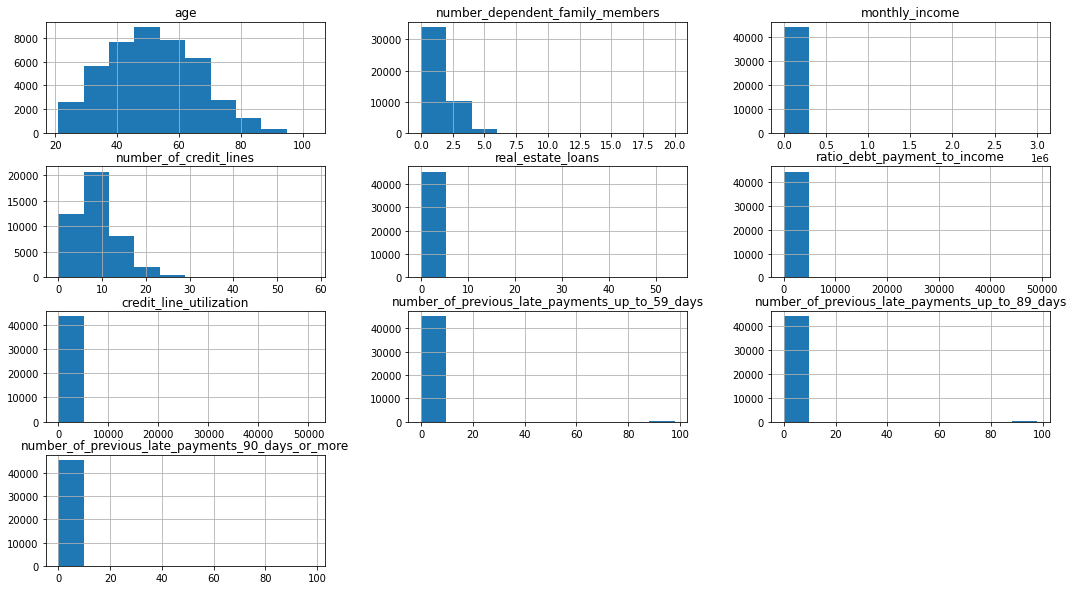

In [100]:
test_df.hist(test_df.columns.values.tolist(), figsize=(18,10))

We can see the same scenario in our test data as well. The values are not distributed well. We can't remove outliers for this data. We can replace them to normalize our distribution.

In [101]:
#Replacing the outlier values
median = test_df['number_of_previous_late_payments_up_to_59_days'].median()
std = test_df['number_of_previous_late_payments_up_to_59_days'].std()
outliers = (test_df['number_of_previous_late_payments_up_to_59_days'] - median).abs() > std
test_df[outliers] = np.nan
test_df['number_of_previous_late_payments_up_to_59_days'].fillna(median, inplace=True)

median = test_df['number_of_previous_late_payments_up_to_89_days'].median()
std = test_df['number_of_previous_late_payments_up_to_89_days'].std()
outliers = (test_df['number_of_previous_late_payments_up_to_89_days'] - median).abs() > std
test_df[outliers] = np.nan
test_df['number_of_previous_late_payments_up_to_89_days'].fillna(median, inplace=True)

median = test_df['number_of_previous_late_payments_90_days_or_more'].median()
std = test_df['number_of_previous_late_payments_90_days_or_more'].std()
outliers = (test_df['number_of_previous_late_payments_90_days_or_more'] - median).abs() > std
test_df[outliers] = np.nan
test_df['number_of_previous_late_payments_90_days_or_more'].fillna(median, inplace=True)

median = test_df['number_of_previous_late_payments_up_to_59_days'].median()
std = test_df['number_of_previous_late_payments_up_to_59_days'].std()
outliers = (test_df['number_of_previous_late_payments_up_to_59_days'] - median).abs() > std
test_df[outliers] = np.nan
test_df['number_of_previous_late_payments_up_to_59_days'].fillna(median, inplace=True)

median = test_df['credit_line_utilization'].median()
std = test_df['credit_line_utilization'].std()
outliers = (test_df['credit_line_utilization'] - median).abs() > std
test_df[outliers] = np.nan
test_df['credit_line_utilization'].fillna(median, inplace=True)

median = test_df['monthly_income'].median()
std = test_df['monthly_income'].std()
outliers = (test_df['monthly_income'] - median).abs() > std
test_df[outliers] = np.nan
test_df['monthly_income'].fillna(median, inplace=True)

median = test_df['real_estate_loans'].median()
std = test_df['real_estate_loans'].std()
outliers = (test_df['real_estate_loans'] - median).abs() > std
test_df[outliers] = np.nan
test_df['real_estate_loans'].fillna(median, inplace=True)

median = test_df['ratio_debt_payment_to_income'].median()
std = test_df['ratio_debt_payment_to_income'].std()
outliers = (test_df['ratio_debt_payment_to_income'] - median).abs() > std
test_df[outliers] = np.nan
test_df['ratio_debt_payment_to_income'].fillna(median, inplace=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'number_dependent_family_members'}>,
        <AxesSubplot:title={'center':'monthly_income'}>],
       [<AxesSubplot:title={'center':'number_of_credit_lines'}>,
        <AxesSubplot:title={'center':'real_estate_loans'}>,
        <AxesSubplot:title={'center':'ratio_debt_payment_to_income'}>],
       [<AxesSubplot:title={'center':'credit_line_utilization'}>,
        <AxesSubplot:title={'center':'number_of_previous_late_payments_up_to_59_days'}>,
        <AxesSubplot:title={'center':'number_of_previous_late_payments_up_to_89_days'}>],
       [<AxesSubplot:title={'center':'number_of_previous_late_payments_90_days_or_more'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

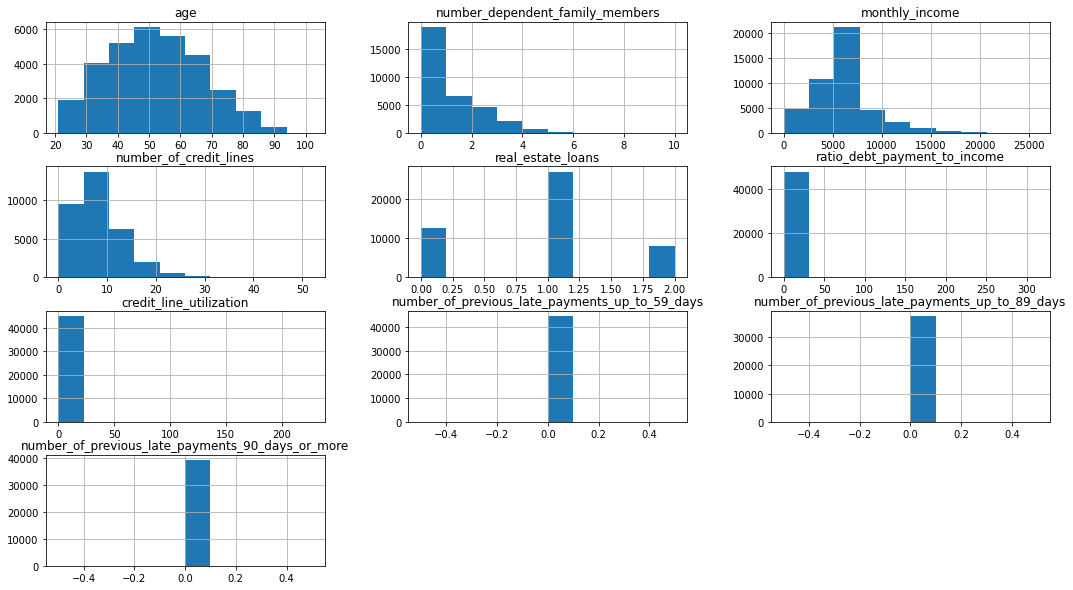

In [102]:
test_df.hist(test_df.columns.values.tolist(), figsize=(18,10))